## Sign Language Image Classification using Deep Learning

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split

# Common imports
import numpy as np
import os, time
import pandas as pd

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

import string

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sign_mnist_test = pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")
sign_mnist_train = pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")

# **Investigating**

In [ ]:
sign_mnist_train['label'].describe()

count    27455.000000
mean        12.325369
std          7.374907
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max        200.000000
Name: label, dtype: float64

We can see from the above that we have a maximum value of label as 200 which is not appropriate as our dataset is a labelled data of images related to signs (hand positions) that represent individual letters which are only 26. As we have a 0 label as min we can consider that there are 25 letters from 0 to 25. Thus, removing the labels which are greater than 25

# **Manipulating**

In [ ]:
sign_mnist_train = sign_mnist_train.loc[sign_mnist_train['label'] < 25]
sign_mnist_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,...,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000,27454.000000
mean,12.318533,145.420267,148.501129,151.248525,153.547316,156.211700,158.412035,160.472937,162.340460,163.955526,...,141.107234,147.495665,153.324179,159.124135,161.968092,162.735558,162.904968,161.965251,161.136665,159.823450
std,7.287537,41.359046,39.942628,39.056766,38.595731,37.111598,36.126006,35.016790,33.662365,32.651980,...,63.751144,65.514087,64.428021,63.709358,63.739183,63.444883,63.510071,63.299560,63.611245,64.397669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.250000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# Class labels to fetch each alphabbets to match with the hand symbols
class_label =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [ ]:
sign_mnist_train['label'].unique()
# Spliting the train dataset
X_train = sign_mnist_train.iloc[:,1:]
y_train = sign_mnist_train.iloc[:,0]

# Displaying the shape of features and label dataset to make sure it's correct
print(f'Shape of Training feature set: {X_train.shape}')
print(f'Shape of Training label set: {y_train.shape}')

Shape of Training feature set: (27454, 784)
Shape of Training label set: (27454,)


In [ ]:
# Splitting the test dataset 
# We also split the testing set given to us into testing and validation subsets
test_set, val_set = train_test_split(sign_mnist_test, test_size=0.5, random_state=42, stratify=sign_mnist_test.iloc[:,0])
X_test = test_set.iloc[:,1:]
y_test = test_set.iloc[:,0]
X_val = val_set.iloc[:,1:]
y_val = val_set.iloc[:,0]

# Displaying the shape of features and label dataset to make sure it's correct
print(f'Shape of Testing feature set: {X_test.shape}')
print(f'Shape of Testing label set: {y_test.shape}')
print(f'Shape of Validation label set: {X_val.shape}')
print(f'Shape of Validation label set: {y_val.shape}')


Shape of Testing feature set: (3586, 784)
Shape of Testing label set: (3586,)
Shape of Validation label set: (3586, 784)
Shape of Validation label set: (3586,)


In [ ]:
# Scale the data appropriately as it starts with max of 255, but we want max of 1
# We will do this "by hand" here

# Training features
X_train = X_train.values/255.0

# Testing features
X_test = X_test.values/255.0

# Validation features
X_val = X_val.values/255.0

# Check that scaled types are appropriate
print(f'Type of training features: {X_train.dtype}')
print(f'Type of testing features: {X_test.dtype}')
print(f'Type of validation features: {X_val.dtype}')

Type of training features: float64
Type of testing features: float64
Type of validation features: float64


# **Displaying data**

label: D


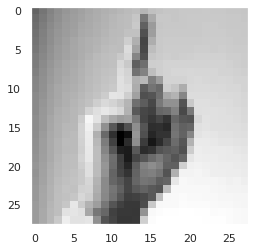

In [ ]:
# Look at first item
print(f'label: {class_label[y_train[0]]}')
plt.imshow(X_train[0,:].reshape(28,28), cmap='gray')
plt.grid(False)
plt.show()

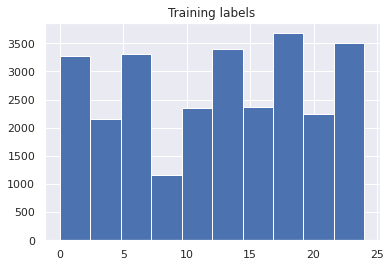

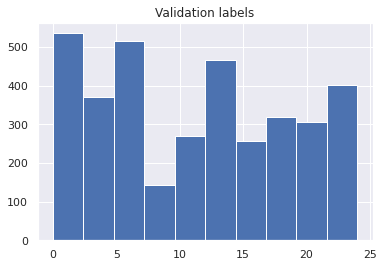

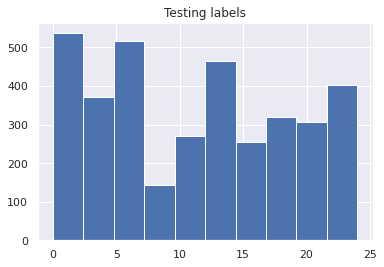

In [ ]:
# Distribution of labels in the training, validation and test sets
plt.hist(y_train)
plt.title("Training labels")
plt.show()
plt.hist(y_val)
plt.title("Validation labels")
plt.show()
plt.hist(y_test)
plt.title("Testing labels")
plt.show()

We will be using regularity factor for our baseline and our model as it gives the best values.

# **Baseline DNN with Regularity**

In [ ]:
# This is *all* the code needed to define the network architecture
#  1 input layer + 2 hidden layers of sizes 300 and 200 + 1 output layer
baseline_dnn_model = keras.models.Sequential()   # This is a style of building networks - the easiest option
baseline_dnn_model.add(keras.layers.Flatten(input_shape = [784]))   # our input is 784 arrays, so need to become 1D
baseline_dnn_model.add(keras.layers.Dense(300, activation = "relu", kernel_constraint = keras.constraints.MaxNorm(2)))    # first hidden layer
baseline_dnn_model.add(keras.layers.Dense(200, activation = "relu", kernel_constraint = keras.constraints.MaxNorm(5)))    # second hidden layer
baseline_dnn_model.add(keras.layers.Dense(25, activation = "softmax"))  # output layer

In [ ]:
# Print out some info on the network - take note of the number of parameters (weights and biases)
baseline_dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 25)                5025      
                                                                 
Total params: 300,725
Trainable params: 300,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Couple the architecture definition to a loss function and optimiser (and other performance metrics)
# Note that we use sparse_categorical_crossentropy because the entries in y_train are just numbers from 0 to 9
# If y_train was encoded as one-hot vectors, then the appropriate loss would be categorical_crossentropy instead
# We will use the SGD optimiser here, but Adam is another popular choice
baseline_dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
# Now train (fit) the model, specifying appropriate data and number of epochs (small here to save time)
# Save the history of metrics versus epochs - *always* keep this
baseline_dnn_history = baseline_dnn_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
858/858 [==============================] - 6s 3ms/step - loss: 1.7891 - accuracy: 0.4416 - val_loss: 1.2725 - val_accuracy: 0.6057
Epoch 2/15
858/858 [==============================] - 2s 3ms/step - loss: 0.7841 - accuracy: 0.7477 - val_loss: 1.0593 - val_accuracy: 0.6241
Epoch 3/15
858/858 [==============================] - 3s 4ms/step - loss: 0.4131 - accuracy: 0.8685 - val_loss: 0.9761 - val_accuracy: 0.7125
Epoch 4/15
858/858 [==============================] - 5s 5ms/step - loss: 0.2448 - accuracy: 0.9258 - val_loss: 0.9257 - val_accuracy: 0.7393
Epoch 5/15
858/858 [==============================] - 4s 5ms/step - loss: 0.1693 - accuracy: 0.9511 - val_loss: 0.8443 - val_accuracy: 0.7830
Epoch 6/15
858/858 [==============================] - 5s 6ms/step - loss: 0.1084 - accuracy: 0.9706 - val_loss: 0.8189 - val_accuracy: 0.7777
Epoch 7/15
858/858 [==============================] - 3s 3ms/step - loss: 0.1266 - accuracy: 0.9623 - val_loss: 0.9334 - val_accuracy: 0.7421
Epoch 

From above regularized baseline best observed Validation Accuracy is 0.8209704160690308


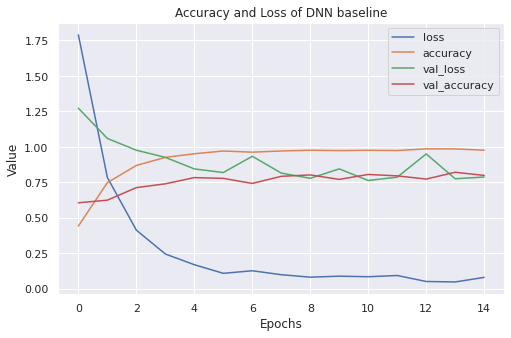

In [ ]:
# Simple way to plot the history information (see later for more detail)
val_acc_max = np.max(baseline_dnn_history.history['val_accuracy'])
print("From above regularized baseline best observed Validation Accuracy is " + str(val_acc_max))
pd.DataFrame(baseline_dnn_history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Accuracy and Loss of DNN baseline")
plt.show()

In [ ]:
# Now run the model on the validation set and get results (loss and accuracy both reported)
testres = baseline_dnn_model.evaluate(X_val, y_val, verbose=0)
print(f'Accuracy: {testres[1]}, Loss: {testres[0]}')

Accuracy: 0.798382580280304, Loss: 0.7872495055198669


# **Baseline CNN with Regularisation**

In [ ]:
baseline_cnn_x_train = X_train.reshape((-1,28,28,1))
baseline_cnn_x_test = X_test.reshape((-1,28,28,1))
baseline_cnn_x_val = X_val.reshape((-1,28,28,1))
print(baseline_cnn_x_train.shape, baseline_cnn_x_test.shape, baseline_cnn_x_val.shape)

(27454, 28, 28, 1) (3586, 28, 28, 1) (3586, 28, 28, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

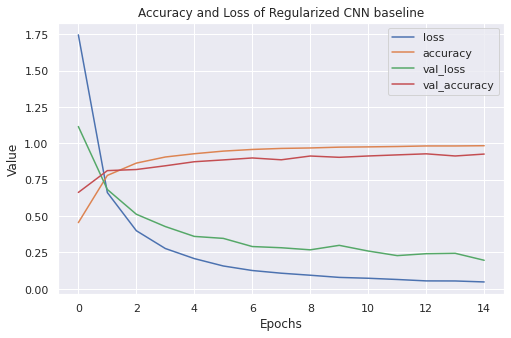

In [ ]:
#Creating Model for CNN Baseline
#  1 input layer + 2 Convolution layers of filter sizes 32 and 64 + 1 output layer
baseline_cnn_model = keras.models.Sequential()
baseline_cnn_model.add(keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation="relu",input_shape=[28, 28, 1]))
baseline_cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
baseline_cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
baseline_cnn_model.add(keras.layers.Dropout(0.2))
baseline_cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
baseline_cnn_model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu"))
baseline_cnn_model.add(keras.layers.Dropout(0.2))
baseline_cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
baseline_cnn_model.add(keras.layers.Flatten())
baseline_cnn_model.add(keras.layers.Dense(25, activation = "softmax"))
baseline_cnn_model.summary()

baseline_cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])
baseline_cnn_history = baseline_cnn_model.fit(baseline_cnn_x_train, y_train, epochs=15, batch_size=32, validation_data=(baseline_cnn_x_val, y_val))
pd.DataFrame(baseline_cnn_history.history).plot(figsize=(8, 5))
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Accuracy and Loss of Regularized CNN baseline")
plt.show()

In [ ]:
# Now run the model on the validation set and get results (loss and accuracy both reported)
testres = baseline_dnn_model.evaluate(X_val, y_val, verbose=0)
print(f'Accuracy: {testres[1]}, Loss: {testres[0]}')

Accuracy: 0.798382580280304, Loss: 0.7872495055198669


# **Optimisation our parameters to get the good values**

# **Optimizing CNN model**

In [ ]:
# Some key parameters
# Define the number and size of hidden layers
hiddensizes = [[16],[16, 32, 16],[16,32,64,32]]
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = [keras.optimizers.SGD, keras.optimizers.Adam]
learningrate = [0.1,0.01,0.001]   # SGD default value
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 20

In [ ]:
# Build a CNN
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    # 1st Hidden Layer
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution         
    model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    # 2nd Hidden Layer
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.Dropout(0.2))                    # Regularisation
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    # Last Hidden Layer
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # Last Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    # Last Layer
    model.add(keras.layers.Dense(25, activation = "softmax"))  # always have 25 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [ ]:
def plot_history(history, h, l, o):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    plt.title("Model with Learning rate:"+str(l)+" Hidden layers: "+str(h)+" Optimizer: "+str(o.__name__))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

In [ ]:
# Early stopping callback - this is executed when fitting and will stop and restore best result
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) 

In [ ]:
def cnn_do_all(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    # fitting CNN model on our choosen hyperparameters
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(baseline_cnn_x_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(baseline_cnn_x_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.2026 - accuracy: 0.6441 - val_loss: 0.7867 - val_accuracy: 0.7663
Epoch 2/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0680 - accuracy: 0.9824 - val_loss: 0.8926 - val_accuracy: 0.8054
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 0.9997 - val_loss: 1.0383 - val_accuracy: 0.8070
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1040 - val_accuracy: 0.8087
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 8.0263e-04 - accuracy: 1.0000 - val_loss: 1.1553 - val_accuracy: 0.8051
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 5.8501e-04 - accuracy: 1.0000 - val_loss: 1.1895 - val_accuracy: 0.8059
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 4.5920e-04 - accuracy: 1.0000 - val_loss: 1.2072 - val_accuracy: 0

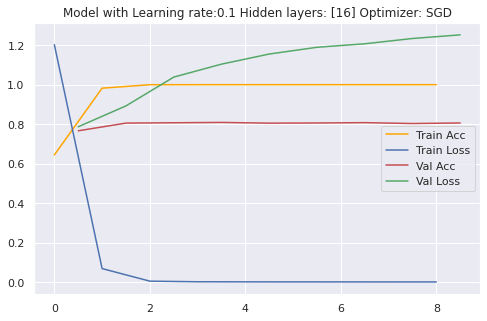

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 2.5931 - accuracy: 0.2341 - val_loss: 1.9024 - val_accuracy: 0.4247
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 1.1742 - accuracy: 0.6420 - val_loss: 1.2202 - val_accuracy: 0.6595
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.7163 - accuracy: 0.7846 - val_loss: 0.9250 - val_accuracy: 0.7128
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4506 - accuracy: 0.8618 - val_loss: 0.8733 - val_accuracy: 0.7437
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.2845 - accuracy: 0.9180 - val_loss: 0.8343 - val_accuracy: 0.7610
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.1707 - accuracy: 0.9550 - val_loss: 0.7427 - val_accuracy: 0.8056
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.1064 - accuracy: 0.9763 - val_loss: 0.8117 - val_accuracy: 0.7911
Epoch 

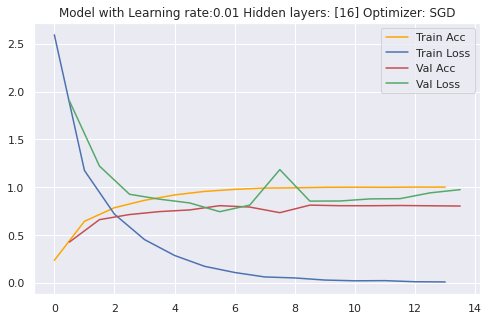

Epoch 1/20
858/858 [==============================] - 3s 4ms/step - loss: 3.2007 - accuracy: 0.0535 - val_loss: 3.1951 - val_accuracy: 0.0368
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1457 - accuracy: 0.0821 - val_loss: 3.1384 - val_accuracy: 0.0906
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 3.0465 - accuracy: 0.1739 - val_loss: 2.9789 - val_accuracy: 0.2170
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 2.7287 - accuracy: 0.2732 - val_loss: 2.5270 - val_accuracy: 0.2538
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 2.1777 - accuracy: 0.3754 - val_loss: 2.0064 - val_accuracy: 0.4032
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 1.8018 - accuracy: 0.4489 - val_loss: 1.8205 - val_accuracy: 0.4400
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 1.5834 - accuracy: 0.5060 - val_loss: 1.8014 - val_accuracy: 0.4350
Epoch 

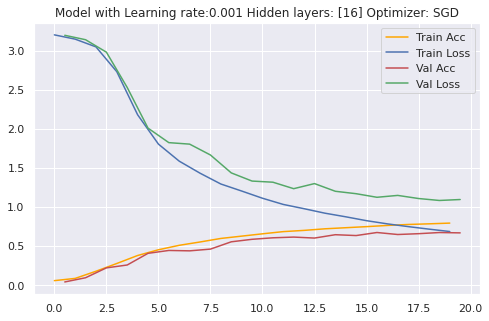

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.2220 - accuracy: 0.6276 - val_loss: 0.5970 - val_accuracy: 0.7978
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 0.1332 - accuracy: 0.9583 - val_loss: 0.4102 - val_accuracy: 0.8745
Epoch 3/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.3500 - val_accuracy: 0.9069
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 0.3693 - val_accuracy: 0.9049
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.4494 - val_accuracy: 0.9024
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.3958 - val_accuracy: 0.9161
Epoch 7/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.4481 - val_accuracy: 0.9191
Epoch 

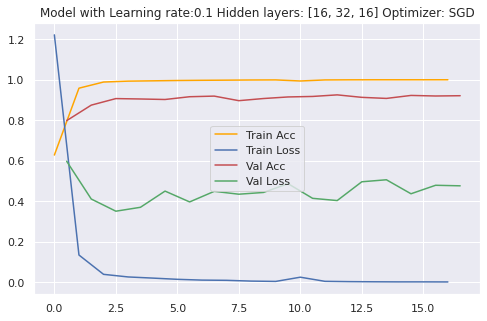

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1750 - accuracy: 0.0568 - val_loss: 3.0963 - val_accuracy: 0.0759
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 2.1796 - accuracy: 0.3441 - val_loss: 1.6311 - val_accuracy: 0.4626
Epoch 3/20
858/858 [==============================] - 3s 4ms/step - loss: 1.0911 - accuracy: 0.6587 - val_loss: 1.0389 - val_accuracy: 0.6537
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 0.6571 - accuracy: 0.7887 - val_loss: 0.8600 - val_accuracy: 0.7131
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.4052 - accuracy: 0.8647 - val_loss: 0.6942 - val_accuracy: 0.7401
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.2513 - accuracy: 0.9173 - val_loss: 0.5266 - val_accuracy: 0.8265
Epoch 7/20
858/858 [==============================] - 3s 4ms/step - loss: 0.1548 - accuracy: 0.9518 - val_loss: 0.4954 - val_accuracy: 0.8307
Epoch 

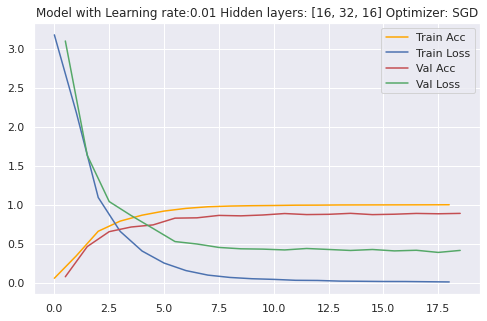

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 3.2172 - accuracy: 0.0442 - val_loss: 3.2177 - val_accuracy: 0.0321
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 3.2019 - accuracy: 0.0463 - val_loss: 3.2100 - val_accuracy: 0.0374
Epoch 3/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1879 - accuracy: 0.0700 - val_loss: 3.2019 - val_accuracy: 0.0533
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1692 - accuracy: 0.0955 - val_loss: 3.1893 - val_accuracy: 0.0627
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1450 - accuracy: 0.1171 - val_loss: 3.1658 - val_accuracy: 0.0580
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1095 - accuracy: 0.1437 - val_loss: 3.1217 - val_accuracy: 0.1196
Epoch 7/20
858/858 [==============================] - 3s 4ms/step - loss: 3.0365 - accuracy: 0.1866 - val_loss: 3.0194 - val_accuracy: 0.2183
Epoch 

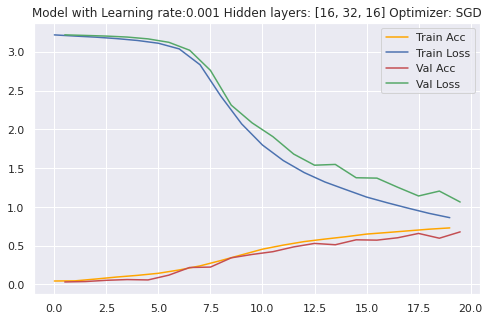

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.6955 - accuracy: 0.4800 - val_loss: 0.5434 - val_accuracy: 0.8564
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1963 - accuracy: 0.9340 - val_loss: 0.3383 - val_accuracy: 0.8650
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0601 - accuracy: 0.9798 - val_loss: 0.2723 - val_accuracy: 0.9141
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.1910 - val_accuracy: 0.9420
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.2731 - val_accuracy: 0.9200
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.1998 - val_accuracy: 0.9479
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.2020 - val_accuracy: 0.9495
Epoch 

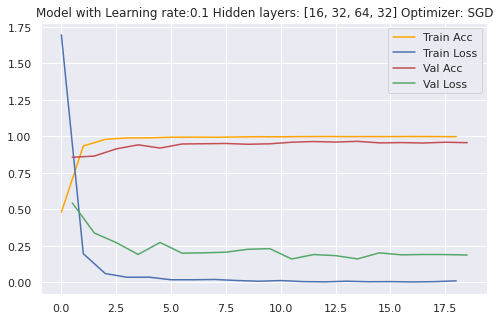

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1796 - accuracy: 0.0624 - val_loss: 3.1716 - val_accuracy: 0.0477
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 2.6933 - accuracy: 0.2057 - val_loss: 2.0760 - val_accuracy: 0.3965
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 1.3071 - accuracy: 0.5735 - val_loss: 1.1334 - val_accuracy: 0.6364
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.6582 - accuracy: 0.7797 - val_loss: 0.7527 - val_accuracy: 0.7571
Epoch 5/20
858/858 [==============================] - 4s 4ms/step - loss: 0.3841 - accuracy: 0.8704 - val_loss: 0.5089 - val_accuracy: 0.8413
Epoch 6/20
858/858 [==============================] - 4s 4ms/step - loss: 0.2426 - accuracy: 0.9173 - val_loss: 0.4210 - val_accuracy: 0.8583
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1641 - accuracy: 0.9458 - val_loss: 0.3213 - val_accuracy: 0.8968
Epoch 

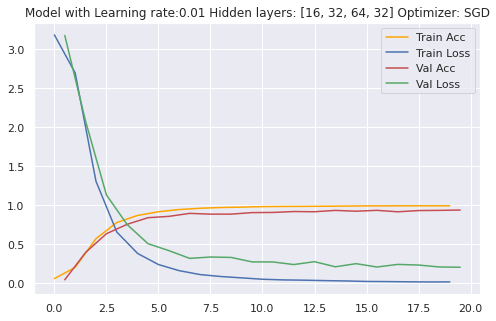

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 3.2114 - accuracy: 0.0475 - val_loss: 3.2145 - val_accuracy: 0.0625
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 3.2002 - accuracy: 0.0492 - val_loss: 3.2109 - val_accuracy: 0.0435
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1895 - accuracy: 0.0540 - val_loss: 3.2059 - val_accuracy: 0.0323
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1776 - accuracy: 0.0651 - val_loss: 3.1996 - val_accuracy: 0.0340
Epoch 5/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1638 - accuracy: 0.0719 - val_loss: 3.1867 - val_accuracy: 0.0335
Epoch 6/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1458 - accuracy: 0.0827 - val_loss: 3.1703 - val_accuracy: 0.0658
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1210 - accuracy: 0.1037 - val_loss: 3.1479 - val_accuracy: 0.0725
Epoch 

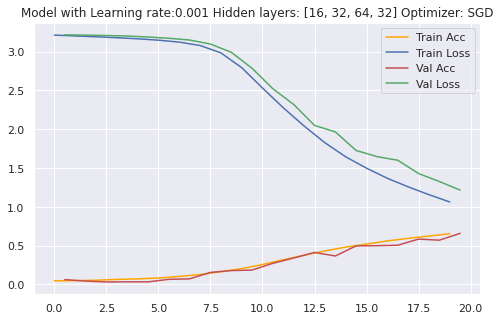

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 3.3028 - accuracy: 0.0440 - val_loss: 3.2315 - val_accuracy: 0.0287
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1979 - accuracy: 0.0430 - val_loss: 3.2227 - val_accuracy: 0.0485
Epoch 3/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1965 - accuracy: 0.0451 - val_loss: 3.2232 - val_accuracy: 0.0371
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1969 - accuracy: 0.0436 - val_loss: 3.2077 - val_accuracy: 0.0485
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1972 - accuracy: 0.0419 - val_loss: 3.2108 - val_accuracy: 0.0432
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1969 - accuracy: 0.0426 - val_loss: 3.2195 - val_accuracy: 0.0485
Epoch 7/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1966 - accuracy: 0.0428 - val_loss: 3.1923 - val_accuracy: 0.0482


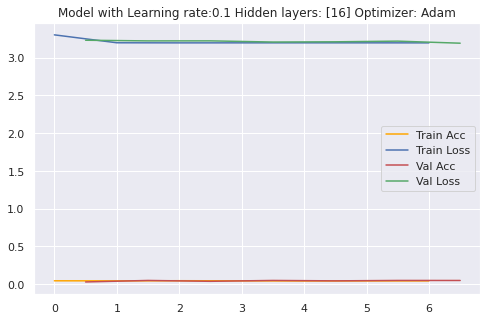

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 0.7194 - accuracy: 0.7864 - val_loss: 1.1952 - val_accuracy: 0.7593
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 1.8965 - val_accuracy: 0.7538
Epoch 3/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 2.3493 - val_accuracy: 0.7047
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0460 - accuracy: 0.9844 - val_loss: 2.3362 - val_accuracy: 0.7468
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 2.5587 - val_accuracy: 0.7320
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 2.8301 - val_accuracy: 0.7688
Epoch 7/20
858/858 [==============================] - 3s 4ms/step - loss: 2.2098e-04 - accuracy: 1.0000 - val_loss: 2.7034 - val_accuracy: 0.7858
Ep

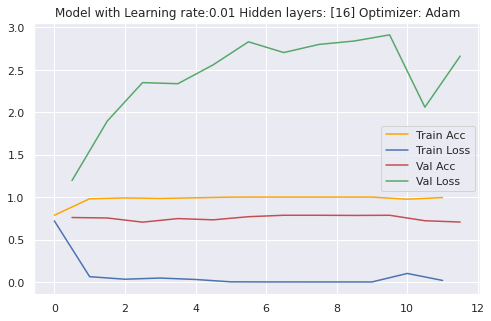

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 0.8144 - accuracy: 0.7695 - val_loss: 0.6618 - val_accuracy: 0.8023
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0624 - accuracy: 0.9869 - val_loss: 0.5356 - val_accuracy: 0.8578
Epoch 3/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0171 - accuracy: 0.9974 - val_loss: 0.6727 - val_accuracy: 0.8419
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0125 - accuracy: 0.9970 - val_loss: 0.6355 - val_accuracy: 0.8698
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6669 - val_accuracy: 0.8614
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.7478 - val_accuracy: 0.8558
Epoch 7/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.7684 - val_accuracy: 0.8723
Epoch 

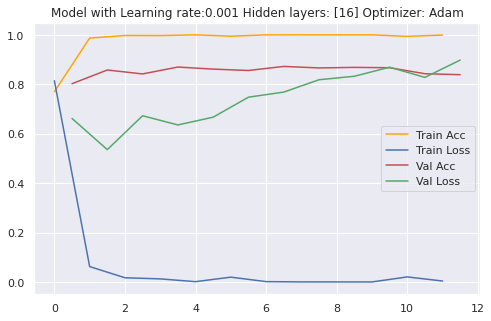

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 3.5467 - accuracy: 0.0437 - val_loss: 3.2331 - val_accuracy: 0.0293
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1969 - accuracy: 0.0431 - val_loss: 3.1997 - val_accuracy: 0.0602
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1955 - accuracy: 0.0440 - val_loss: 3.2171 - val_accuracy: 0.0602
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1962 - accuracy: 0.0420 - val_loss: 3.2356 - val_accuracy: 0.0293
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1976 - accuracy: 0.0434 - val_loss: 3.2199 - val_accuracy: 0.0371
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 3.1955 - accuracy: 0.0432 - val_loss: 3.2279 - val_accuracy: 0.0293
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1979 - accuracy: 0.0447 - val_loss: 3.2276 - val_accuracy: 0.0407


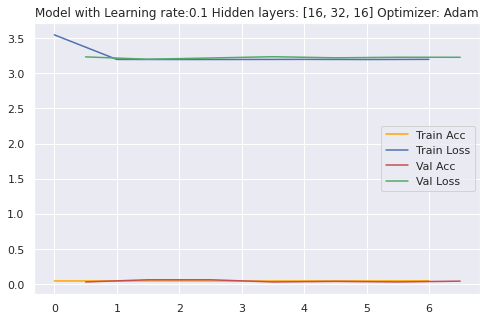

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.0244 - accuracy: 0.6806 - val_loss: 0.8005 - val_accuracy: 0.7582
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 0.2496 - accuracy: 0.9146 - val_loss: 0.7969 - val_accuracy: 0.7886
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1725 - accuracy: 0.9417 - val_loss: 0.8450 - val_accuracy: 0.7934
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1624 - accuracy: 0.9444 - val_loss: 0.7946 - val_accuracy: 0.8154
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.1383 - accuracy: 0.9530 - val_loss: 0.8829 - val_accuracy: 0.8107
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.1292 - accuracy: 0.9576 - val_loss: 1.0428 - val_accuracy: 0.8235
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1198 - accuracy: 0.9604 - val_loss: 1.1832 - val_accuracy: 0.7992
Epoch 

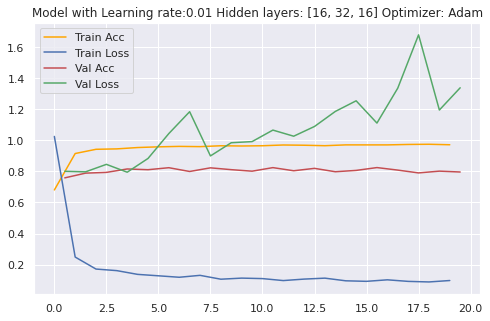

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.1411 - accuracy: 0.6484 - val_loss: 0.5216 - val_accuracy: 0.8263
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 0.1119 - accuracy: 0.9675 - val_loss: 0.3727 - val_accuracy: 0.8751
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0317 - accuracy: 0.9914 - val_loss: 0.2861 - val_accuracy: 0.9149
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.3175 - val_accuracy: 0.9088
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.3087 - val_accuracy: 0.9122
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.3469 - val_accuracy: 0.9136
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.3981 - val_accuracy: 0.9144
Epoch 

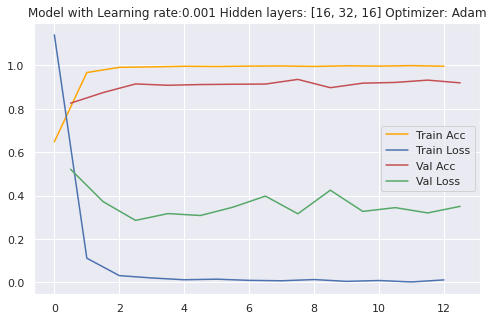

Epoch 1/20
858/858 [==============================] - 4s 5ms/step - loss: 4.3101 - accuracy: 0.0437 - val_loss: 3.2339 - val_accuracy: 0.0343
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1954 - accuracy: 0.0426 - val_loss: 3.2388 - val_accuracy: 0.0229
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1988 - accuracy: 0.0425 - val_loss: 3.2320 - val_accuracy: 0.0287
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1967 - accuracy: 0.0442 - val_loss: 3.1978 - val_accuracy: 0.0343
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1960 - accuracy: 0.0418 - val_loss: 3.2375 - val_accuracy: 0.0371
Epoch 6/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1962 - accuracy: 0.0413 - val_loss: 3.2167 - val_accuracy: 0.0549
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 3.1950 - accuracy: 0.0439 - val_loss: 3.2233 - val_accuracy: 0.0432
Epoch 

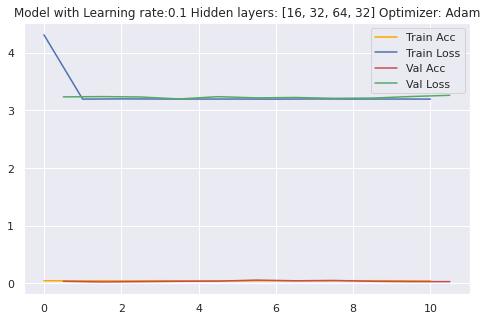

Epoch 1/20
858/858 [==============================] - 5s 5ms/step - loss: 3.1844 - accuracy: 0.0428 - val_loss: 3.2065 - val_accuracy: 0.0371
Epoch 2/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1792 - accuracy: 0.0443 - val_loss: 3.2012 - val_accuracy: 0.0346
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1780 - accuracy: 0.0445 - val_loss: 3.2080 - val_accuracy: 0.0293
Epoch 4/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1784 - accuracy: 0.0438 - val_loss: 3.1965 - val_accuracy: 0.0201
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1782 - accuracy: 0.0431 - val_loss: 3.2031 - val_accuracy: 0.0229
Epoch 6/20
858/858 [==============================] - 4s 5ms/step - loss: 3.1780 - accuracy: 0.0434 - val_loss: 3.2067 - val_accuracy: 0.0201


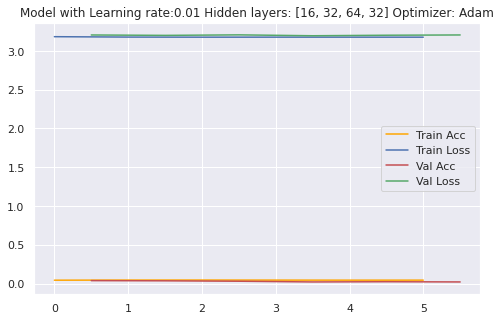

Epoch 1/20
858/858 [==============================] - 5s 5ms/step - loss: 1.1238 - accuracy: 0.6471 - val_loss: 0.3850 - val_accuracy: 0.8801
Epoch 2/20
858/858 [==============================] - 4s 5ms/step - loss: 0.1180 - accuracy: 0.9618 - val_loss: 0.2106 - val_accuracy: 0.9331
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.1965 - val_accuracy: 0.9453
Epoch 4/20
858/858 [==============================] - 4s 5ms/step - loss: 0.0352 - accuracy: 0.9883 - val_loss: 0.2098 - val_accuracy: 0.9442
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.2301 - val_accuracy: 0.9426
Epoch 6/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0272 - accuracy: 0.9907 - val_loss: 0.1952 - val_accuracy: 0.9532
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.1973 - val_accuracy: 0.9565
Epoch 

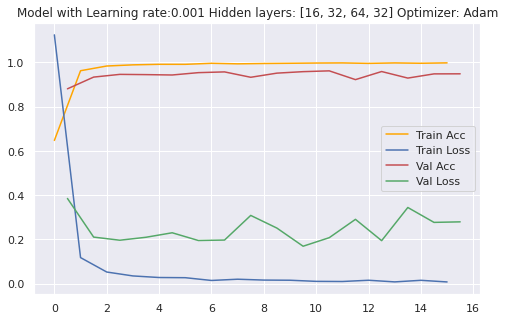

Best accuracy :  0.9659788012504578


In [ ]:
# Learning rate
cnn_res=[]
for o in optimizer:
  for h in hiddensizes:
    for lr in learningrate:
      valacc, history, model= cnn_do_all(h, actfn, o, lr, n_epochs, batch_size, further_callbacks=[])
      plot_history(history,h,lr,o)
      cnn_res += [[valacc,h, o.__name__, lr]]

cnn_res.sort(reverse=True)
print("Best accuracy : ",cnn_res[0][0])

In [ ]:
print("Did tuning combinations with the resulted accuracy")
cnn_res_df =  pd.DataFrame(data=cnn_res,columns=["Val_Accuracy","Hidden Layers","Optimizer","Learning Rate"])
cnn_res_df

Did tuning combinations with the resulted accuracy


,Val_Accuracy,Hidden Layers,Optimizer,Learning Rate
0,0.965979,"[16, 32, 64, 32]",SGD,0.100
1,0.961238,"[16, 32, 64, 32]",Adam,0.001
2,0.939487,"[16, 32, 64, 32]",SGD,0.010
3,0.935862,"[16, 32, 16]",Adam,0.001
4,0.925265,"[16, 32, 16]",SGD,0.100
5,0.888176,"[16, 32, 16]",SGD,0.010
6,0.872281,[16],Adam,0.001
7,0.824317,"[16, 32, 16]",Adam,0.010
8,0.811210,[16],SGD,0.010
9,0.808701,[16],SGD,0.100


In [ ]:
print("From the above DataFrame we got the best and the second best parameters as: ")
cnn_res_df.iloc[:2,:]

From the above DataFrame we got the best and the second best parameters as: 


,Val_Accuracy,Hidden Layers,Optimizer,Learning Rate
0,0.965979,"[16, 32, 64, 32]",SGD,0.100
1,0.961238,"[16, 32, 64, 32]",Adam,0.001


# **Optimizing Densely connected Model**

In [ ]:
# Some key parameters
# Define the number and size of hidden layers
hiddensizes = [[300], [300, 100], [300, 200, 400]]

# Define the activation function to be used by hidden layers
actfn = "relu"

# Optimiser and learning rate
optimizer = [keras.optimizers.SGD,keras.optimizers.Adam]
learningrate = [0.001,0.0001,0.1]   

# Set size of batch and number of epochs
batch_size = 32
n_epochs = 20

In [ ]:
def model_dnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [784]))    # always have same sized inputs
    model.add(keras.layers.Dense(hiddensizes[0], activation = actfn, kernel_constraint=keras.constraints.MaxNorm(2)))
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Dense(n, activation = actfn, kernel_constraint = keras.constraints.MaxNorm(5))) # Regularisation
    model.add(keras.layers.Dense(25, activation = "softmax"))   # always have 25 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
def dnn_do_all(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    # fitting CNN model on our choosen hyperparameters
    model = model_dnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1132 - accuracy: 0.0957 - val_loss: 3.0449 - val_accuracy: 0.1587
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 2.9495 - accuracy: 0.2181 - val_loss: 2.9123 - val_accuracy: 0.2273
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 2.8178 - accuracy: 0.3048 - val_loss: 2.8018 - val_accuracy: 0.2858
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 2.6913 - accuracy: 0.3725 - val_loss: 2.6739 - val_accuracy: 0.3578
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 2.5685 - accuracy: 0.4237 - val_loss: 2.5719 - val_accuracy: 0.3876
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 2.4519 - accuracy: 0.4594 - val_loss: 2.4557 - val_accuracy: 0.4233
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 2.3423 - accuracy: 0.4865 - val_loss: 2.3510 - val_accuracy: 0.4526
Epoch 

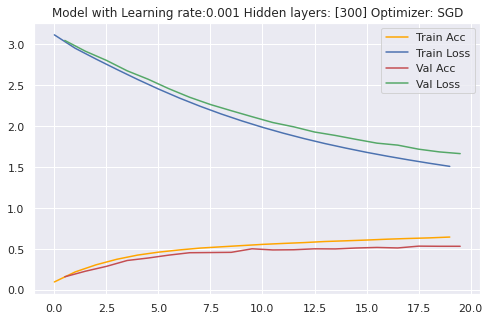

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.3182 - accuracy: 0.0450 - val_loss: 3.2196 - val_accuracy: 0.0496
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1805 - accuracy: 0.0733 - val_loss: 3.1841 - val_accuracy: 0.0594
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1493 - accuracy: 0.0891 - val_loss: 3.1675 - val_accuracy: 0.0544
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1294 - accuracy: 0.0955 - val_loss: 3.1510 - val_accuracy: 0.0625
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1115 - accuracy: 0.1037 - val_loss: 3.1336 - val_accuracy: 0.0711
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 3.0946 - accuracy: 0.1170 - val_loss: 3.1187 - val_accuracy: 0.0745
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 3.0786 - accuracy: 0.1311 - val_loss: 3.1033 - val_accuracy: 0.0828
Epoch 

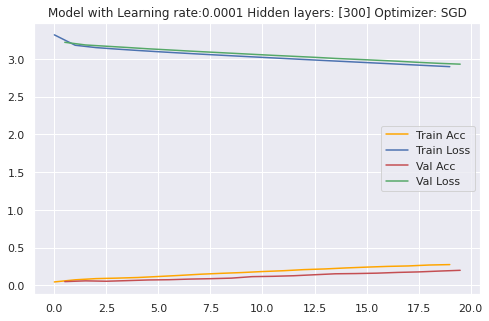

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 2.2266 - accuracy: 0.3071 - val_loss: 1.6644 - val_accuracy: 0.4805
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 1.6117 - accuracy: 0.4868 - val_loss: 1.3144 - val_accuracy: 0.5845
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 1.4022 - accuracy: 0.5507 - val_loss: 1.4680 - val_accuracy: 0.5418
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 1.3887 - accuracy: 0.5649 - val_loss: 1.8038 - val_accuracy: 0.4615
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 1.4188 - accuracy: 0.5487 - val_loss: 1.5720 - val_accuracy: 0.4738
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 1.3394 - accuracy: 0.5769 - val_loss: 1.6863 - val_accuracy: 0.4877
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 1.3674 - accuracy: 0.5687 - val_loss: 1.5179 - val_accuracy: 0.4947


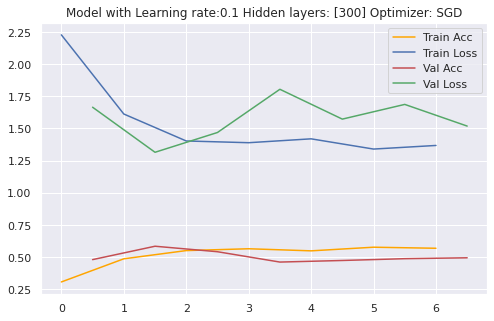

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1430 - accuracy: 0.0796 - val_loss: 3.0540 - val_accuracy: 0.0912
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 2.9837 - accuracy: 0.1906 - val_loss: 2.9257 - val_accuracy: 0.2276
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 2.8576 - accuracy: 0.2872 - val_loss: 2.8074 - val_accuracy: 0.3232
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 2.7329 - accuracy: 0.3573 - val_loss: 2.6853 - val_accuracy: 0.3550
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 2.6110 - accuracy: 0.3990 - val_loss: 2.5673 - val_accuracy: 0.3912
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 2.4940 - accuracy: 0.4431 - val_loss: 2.4621 - val_accuracy: 0.4175
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 2.3835 - accuracy: 0.4696 - val_loss: 2.3675 - val_accuracy: 0.4406
Epoch 

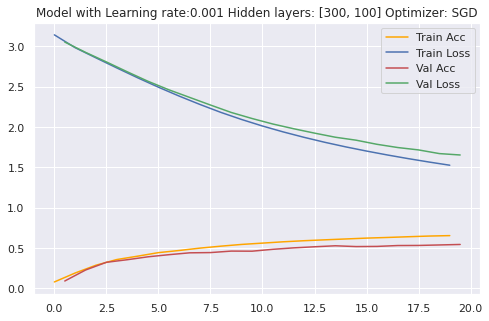

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.3285 - accuracy: 0.0457 - val_loss: 3.2719 - val_accuracy: 0.0365
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 3.2008 - accuracy: 0.0504 - val_loss: 3.2185 - val_accuracy: 0.0287
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1615 - accuracy: 0.0655 - val_loss: 3.1887 - val_accuracy: 0.0416
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1360 - accuracy: 0.0833 - val_loss: 3.1666 - val_accuracy: 0.0516
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1146 - accuracy: 0.0969 - val_loss: 3.1468 - val_accuracy: 0.0608
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 3.0958 - accuracy: 0.1140 - val_loss: 3.1323 - val_accuracy: 0.0680
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 3.0784 - accuracy: 0.1297 - val_loss: 3.1162 - val_accuracy: 0.0756
Epoch 

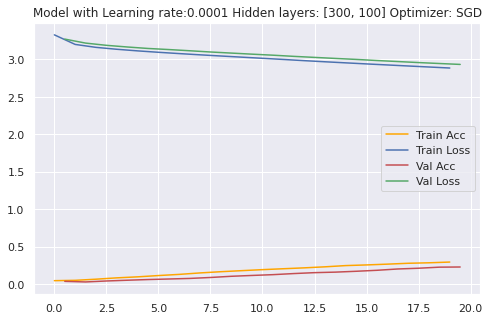

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 2.2028 - accuracy: 0.3157 - val_loss: 1.7724 - val_accuracy: 0.3971
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 1.5527 - accuracy: 0.4984 - val_loss: 1.5039 - val_accuracy: 0.4835
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 1.3390 - accuracy: 0.5705 - val_loss: 1.4738 - val_accuracy: 0.5413
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 1.2611 - accuracy: 0.5997 - val_loss: 1.6516 - val_accuracy: 0.4685
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 1.3128 - accuracy: 0.5902 - val_loss: 1.2312 - val_accuracy: 0.6180
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 1.2968 - accuracy: 0.5951 - val_loss: 1.3895 - val_accuracy: 0.5895
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 1.5627 - accuracy: 0.5209 - val_loss: 1.7543 - val_accuracy: 0.5282
Epoch 

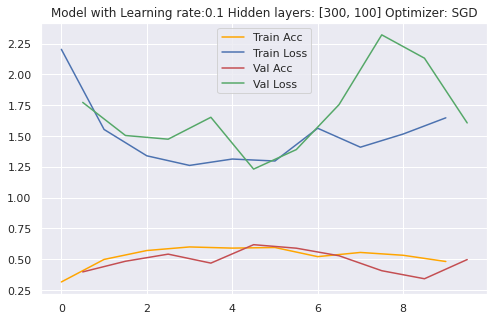

Epoch 1/20
858/858 [==============================] - 43s 50ms/step - loss: 3.1203 - accuracy: 0.1015 - val_loss: 3.0572 - val_accuracy: 0.1288
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 2.9684 - accuracy: 0.1990 - val_loss: 2.9304 - val_accuracy: 0.2075
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 2.8282 - accuracy: 0.2683 - val_loss: 2.7911 - val_accuracy: 0.2819
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 2.6779 - accuracy: 0.3322 - val_loss: 2.6442 - val_accuracy: 0.3399
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 2.5178 - accuracy: 0.3811 - val_loss: 2.4973 - val_accuracy: 0.3572
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 2.3587 - accuracy: 0.4200 - val_loss: 2.3449 - val_accuracy: 0.3857
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 2.2081 - accuracy: 0.4525 - val_loss: 2.2040 - val_accuracy: 0.4083
Epoc

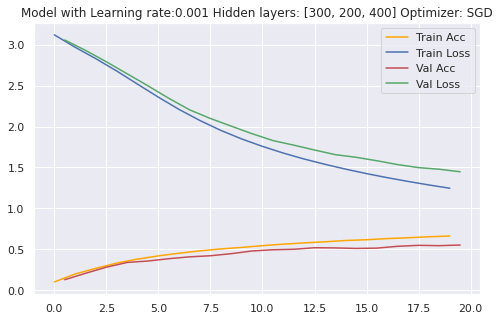

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.2703 - accuracy: 0.0330 - val_loss: 3.2322 - val_accuracy: 0.0413
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 3.2065 - accuracy: 0.0457 - val_loss: 3.2037 - val_accuracy: 0.0474
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1744 - accuracy: 0.0641 - val_loss: 3.1859 - val_accuracy: 0.0616
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1528 - accuracy: 0.0871 - val_loss: 3.1717 - val_accuracy: 0.0686
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1364 - accuracy: 0.1038 - val_loss: 3.1597 - val_accuracy: 0.0753
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1224 - accuracy: 0.1158 - val_loss: 3.1492 - val_accuracy: 0.0820
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1100 - accuracy: 0.1225 - val_loss: 3.1387 - val_accuracy: 0.0851
Epoch 

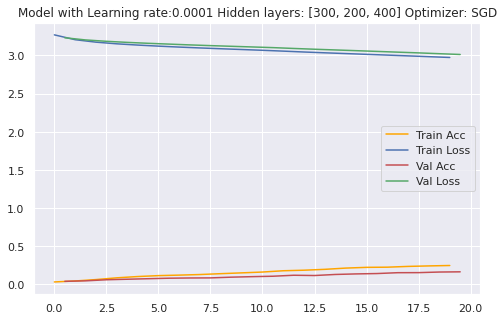

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 2.4368 - accuracy: 0.2516 - val_loss: 1.8626 - val_accuracy: 0.3809
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 1.4924 - accuracy: 0.5115 - val_loss: 1.5184 - val_accuracy: 0.5086
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 1.1285 - accuracy: 0.6300 - val_loss: 1.2208 - val_accuracy: 0.5563
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 1.1395 - accuracy: 0.6406 - val_loss: 1.2079 - val_accuracy: 0.5764
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 0.9548 - accuracy: 0.6932 - val_loss: 0.9480 - val_accuracy: 0.6726
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 1.1704 - accuracy: 0.6360 - val_loss: 3.6262 - val_accuracy: 0.2301
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 1.0797 - accuracy: 0.6634 - val_loss: 1.1069 - val_accuracy: 0.6263
Epoch 

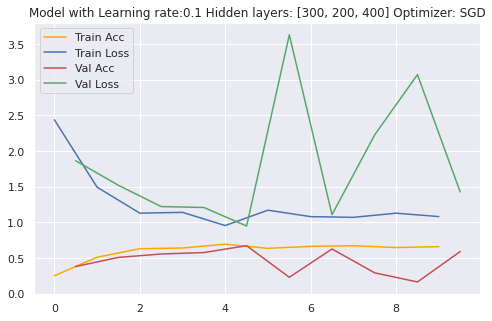

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 1.8588 - accuracy: 0.4575 - val_loss: 1.4380 - val_accuracy: 0.5597
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 0.9939 - accuracy: 0.7007 - val_loss: 1.2802 - val_accuracy: 0.6068
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 0.7337 - accuracy: 0.7804 - val_loss: 1.1170 - val_accuracy: 0.6336
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.5788 - accuracy: 0.8367 - val_loss: 1.0810 - val_accuracy: 0.6539
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4675 - accuracy: 0.8704 - val_loss: 0.9583 - val_accuracy: 0.6952
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 0.3941 - accuracy: 0.8904 - val_loss: 0.9277 - val_accuracy: 0.6949
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 0.3272 - accuracy: 0.9155 - val_loss: 0.9761 - val_accuracy: 0.6980
Epoch 

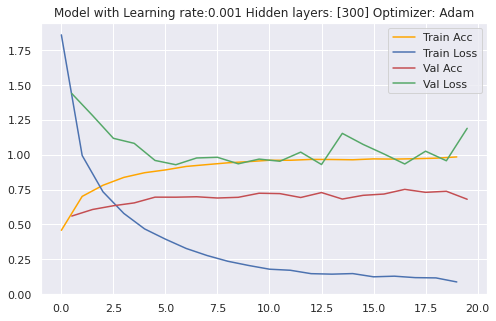

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 2.5181 - accuracy: 0.3354 - val_loss: 2.1157 - val_accuracy: 0.4311
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 1.7504 - accuracy: 0.5568 - val_loss: 1.7029 - val_accuracy: 0.5078
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 1.4067 - accuracy: 0.6386 - val_loss: 1.4980 - val_accuracy: 0.5452
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 1.1927 - accuracy: 0.6895 - val_loss: 1.3561 - val_accuracy: 0.6046
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 1.0392 - accuracy: 0.7306 - val_loss: 1.2571 - val_accuracy: 0.6241
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.9192 - accuracy: 0.7669 - val_loss: 1.1545 - val_accuracy: 0.6693
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 0.8207 - accuracy: 0.7969 - val_loss: 1.1168 - val_accuracy: 0.6523
Epoch 

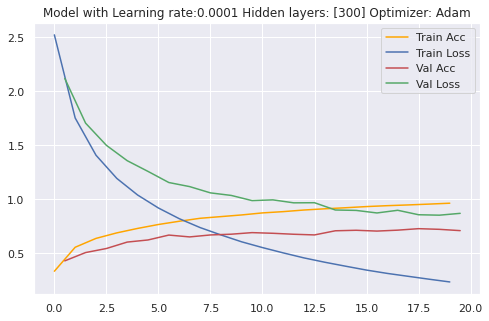

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.9242 - accuracy: 0.0421 - val_loss: 3.2265 - val_accuracy: 0.0371
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1941 - accuracy: 0.0406 - val_loss: 3.2163 - val_accuracy: 0.0343
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1970 - accuracy: 0.0423 - val_loss: 3.1929 - val_accuracy: 0.0485
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1949 - accuracy: 0.0442 - val_loss: 3.2404 - val_accuracy: 0.0371
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1954 - accuracy: 0.0456 - val_loss: 3.2077 - val_accuracy: 0.0343
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1965 - accuracy: 0.0426 - val_loss: 3.2494 - val_accuracy: 0.0201
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1978 - accuracy: 0.0452 - val_loss: 3.2234 - val_accuracy: 0.0463
Epoch 

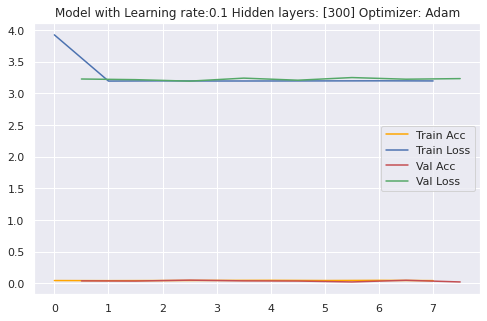

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 1.9033 - accuracy: 0.4465 - val_loss: 1.4983 - val_accuracy: 0.5223
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 1.0420 - accuracy: 0.6854 - val_loss: 1.1767 - val_accuracy: 0.6436
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.7803 - accuracy: 0.7699 - val_loss: 1.1971 - val_accuracy: 0.6319
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.6535 - accuracy: 0.8124 - val_loss: 1.0455 - val_accuracy: 0.6687
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.5478 - accuracy: 0.8471 - val_loss: 1.0486 - val_accuracy: 0.6768
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.8735 - val_loss: 0.9852 - val_accuracy: 0.6729
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.3892 - accuracy: 0.8975 - val_loss: 1.0722 - val_accuracy: 0.6590
Epoch 

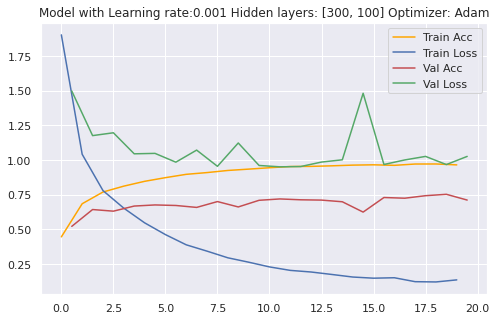

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 2.5693 - accuracy: 0.3170 - val_loss: 2.1847 - val_accuracy: 0.4205
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 1.8028 - accuracy: 0.5498 - val_loss: 1.7543 - val_accuracy: 0.5059
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 1.4458 - accuracy: 0.6362 - val_loss: 1.5372 - val_accuracy: 0.5455
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 1.2290 - accuracy: 0.6910 - val_loss: 1.4217 - val_accuracy: 0.5828
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 1.0756 - accuracy: 0.7285 - val_loss: 1.2973 - val_accuracy: 0.6062
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.9574 - accuracy: 0.7587 - val_loss: 1.2491 - val_accuracy: 0.6252
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.8628 - accuracy: 0.7852 - val_loss: 1.1862 - val_accuracy: 0.6375
Epoch 

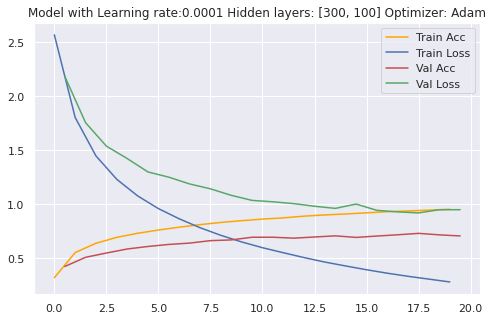

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 3.8199 - accuracy: 0.0428 - val_loss: 3.2083 - val_accuracy: 0.0293
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1952 - accuracy: 0.0414 - val_loss: 3.1939 - val_accuracy: 0.0432
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1956 - accuracy: 0.0406 - val_loss: 3.2098 - val_accuracy: 0.0343
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1975 - accuracy: 0.0443 - val_loss: 3.2067 - val_accuracy: 0.0371
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1957 - accuracy: 0.0435 - val_loss: 3.2207 - val_accuracy: 0.0293
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 3.1959 - accuracy: 0.0428 - val_loss: 3.2285 - val_accuracy: 0.0407
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1963 - accuracy: 0.0431 - val_loss: 3.2285 - val_accuracy: 0.0343


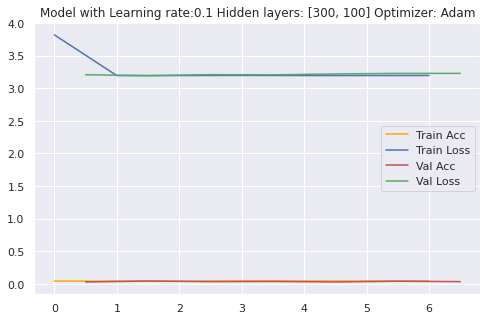

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 1.7568 - accuracy: 0.4550 - val_loss: 1.3231 - val_accuracy: 0.5917
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 0.7786 - accuracy: 0.7452 - val_loss: 0.9911 - val_accuracy: 0.7066
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4329 - accuracy: 0.8625 - val_loss: 0.9106 - val_accuracy: 0.7289
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.2629 - accuracy: 0.9207 - val_loss: 1.0785 - val_accuracy: 0.6673
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.1787 - accuracy: 0.9486 - val_loss: 0.9003 - val_accuracy: 0.7582
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.1238 - accuracy: 0.9666 - val_loss: 0.9767 - val_accuracy: 0.7398
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.1232 - accuracy: 0.9631 - val_loss: 0.8779 - val_accuracy: 0.7716
Epoch 

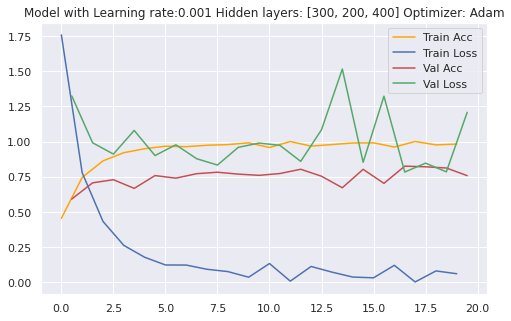

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 2.3968 - accuracy: 0.3441 - val_loss: 1.8576 - val_accuracy: 0.4518
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 1.4518 - accuracy: 0.5988 - val_loss: 1.4484 - val_accuracy: 0.5613
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 1.0904 - accuracy: 0.6993 - val_loss: 1.2863 - val_accuracy: 0.6191
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.8760 - accuracy: 0.7651 - val_loss: 1.1402 - val_accuracy: 0.6464
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.7211 - accuracy: 0.8074 - val_loss: 1.0480 - val_accuracy: 0.6776
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.6045 - accuracy: 0.8433 - val_loss: 1.0045 - val_accuracy: 0.6882
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.5052 - accuracy: 0.8721 - val_loss: 0.9743 - val_accuracy: 0.7013
Epoch 

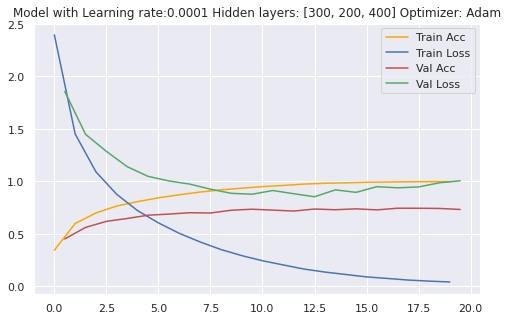

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 4.9560 - accuracy: 0.0416 - val_loss: 3.2097 - val_accuracy: 0.0463
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1970 - accuracy: 0.0424 - val_loss: 3.2483 - val_accuracy: 0.0407
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1971 - accuracy: 0.0407 - val_loss: 3.2094 - val_accuracy: 0.0407
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1971 - accuracy: 0.0439 - val_loss: 3.2527 - val_accuracy: 0.0201
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1963 - accuracy: 0.0432 - val_loss: 3.2297 - val_accuracy: 0.0287
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 3.1961 - accuracy: 0.0433 - val_loss: 3.2414 - val_accuracy: 0.0293


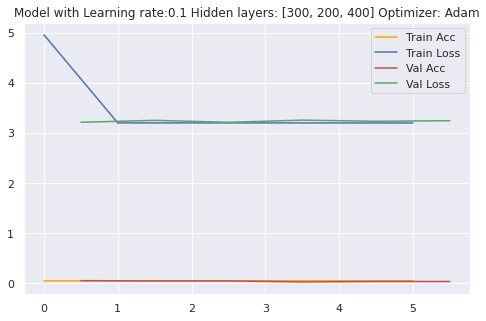

Best accuracy :  0.8251533508300781


In [ ]:
# Learning rate
dnn_res=[]
for o in optimizer:
  for h in hiddensizes:
    for lr in learningrate:
      valacc, history, model= dnn_do_all(h, actfn, o, lr, n_epochs, batch_size)
      plot_history(history,h,lr,o)
      dnn_res += [[valacc,h, o.__name__, lr]]

dnn_res.sort(reverse=True)
print("Best accuracy : ",dnn_res[0][0])

In [50]:
print("Did tuning combinations with the resulted accuracy")
dnn_res_df =  pd.DataFrame(data=dnn_res,columns=["Val_Accuracy","Hidden Layers","Optimizer","Learning Rate"])
dnn_res_df

Did tuning combinations with the resulted accuracy


,Val_Accuracy,Hidden Layers,Optimizer,Learning Rate
0,0.825153,"[300, 200, 400]",Adam,0.0010
1,0.753486,"[300, 100]",Adam,0.0010
2,0.750976,[300],Adam,0.0010
3,0.744283,"[300, 200, 400]",Adam,0.0001
4,0.728388,[300],Adam,0.0001
5,0.727830,"[300, 100]",Adam,0.0001
6,0.672616,"[300, 200, 400]",SGD,0.1000
7,0.617959,"[300, 100]",SGD,0.1000
8,0.584495,[300],SGD,0.1000
9,0.552705,"[300, 200, 400]",SGD,0.0010


In [51]:
print("From the above DataFrame we got the best and the second best parameters as: ")
dnn_res_df.iloc[:2,:]

From the above DataFrame we got the best and the second best parameters as: 


,Val_Accuracy,Hidden Layers,Optimizer,Learning Rate
0,0.825153,"[300, 200, 400]",Adam,0.001
1,0.753486,"[300, 100]",Adam,0.001


In [52]:
# testing for our test data
# for CNN
max_val_acc_test, history_test, model_test = cnn_do_all([16,32,64,32], actfn, keras.optimizers.SGD, 0.1, n_epochs, batch_size, further_callbacks=[])
test_eval = model_test.evaluate(baseline_cnn_x_test,y_test)

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.6351 - accuracy: 0.4937 - val_loss: 0.4597 - val_accuracy: 0.8795
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1783 - accuracy: 0.9398 - val_loss: 0.2859 - val_accuracy: 0.9085
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 0.0555 - accuracy: 0.9815 - val_loss: 0.2259 - val_accuracy: 0.9361
Epoch 4/20
858/858 [==============================] - 4s 5ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.2005 - val_accuracy: 0.9364
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 0.2241 - val_accuracy: 0.9406
Epoch 6/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.2097 - val_accuracy: 0.9328
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.2483 - val_accuracy: 0.9417
Epoch 

In [53]:
print(f"Test Accuracy: {test_eval[1]} and Test Loss: {test_eval[0]}")

Test Accuracy: 0.9570552110671997 and Test Loss: 0.14523857831954956


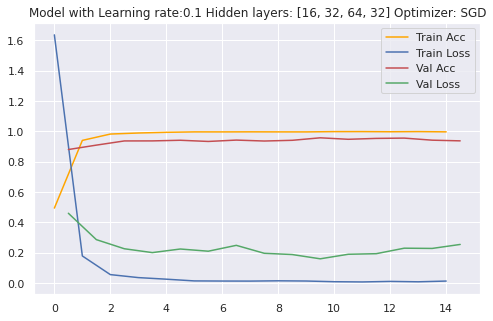

In [54]:
plot_history(history_test,[16,32,64,32],0.1,keras.optimizers.SGD)

In [55]:
# for densely connected 
dnn_max_val_acc_test, history_test_dnn, model_test_dnn = dnn_do_all([300,200,400], actfn, keras.optimizers.Adam, 0.001, n_epochs, batch_size, further_callbacks=[])
test_eval_dnn = model_test_dnn.evaluate(X_test,y_test)

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 1.7582 - accuracy: 0.4500 - val_loss: 1.3021 - val_accuracy: 0.5680
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 0.7790 - accuracy: 0.7453 - val_loss: 0.9864 - val_accuracy: 0.6760
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.4069 - accuracy: 0.8709 - val_loss: 0.8815 - val_accuracy: 0.7097
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.2501 - accuracy: 0.9235 - val_loss: 0.8128 - val_accuracy: 0.7515
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 0.1642 - accuracy: 0.9513 - val_loss: 1.0409 - val_accuracy: 0.7061
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.1323 - accuracy: 0.9624 - val_loss: 0.7997 - val_accuracy: 0.7825
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 0.0854 - accuracy: 0.9772 - val_loss: 0.9163 - val_accuracy: 0.7582
Epoch 

In [56]:
print(f"Test Accuracy: {test_eval_dnn[1]} and Test Loss: {test_eval_dnn[0]}")

Test Accuracy: 0.8315672278404236 and Test Loss: 0.7939628958702087


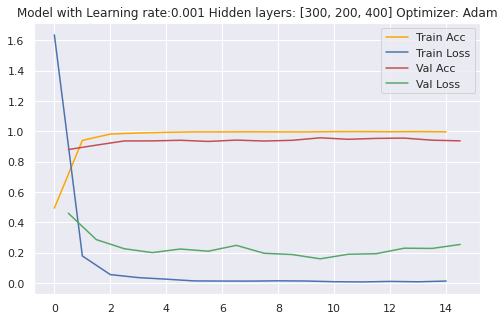

In [57]:
plot_history(history_test,[300,200,400],0.001,keras.optimizers.Adam)

From the above data we can see that CNN gives the best accuracy. Thus we choose CNN model.

In [58]:
from sklearn.metrics import confusion_matrix

y_pred = model_test.predict(baseline_cnn_x_test)
predicted_class_names=np.argmax(y_pred,axis=1)
matrix = confusion_matrix(y_test, predicted_class_names)
character_df = pd.DataFrame(data = class_label,columns=["Characters"])
char_acc = pd.DataFrame(data = matrix.diagonal()/matrix.sum(axis=1),columns=["Accuracy"])
character_df = pd.concat([character_df,char_acc],axis=1)
character_df

,Characters,Accuracy
0,A,1.000000
1,B,1.000000
2,C,1.000000
3,D,0.991803
4,E,0.979920
5,F,1.000000
6,G,0.896552
7,H,0.963303
8,I,1.000000
9,K,0.975904


Text(0.5, 1.0, 'Confusion Matrix for all 24 Letters')

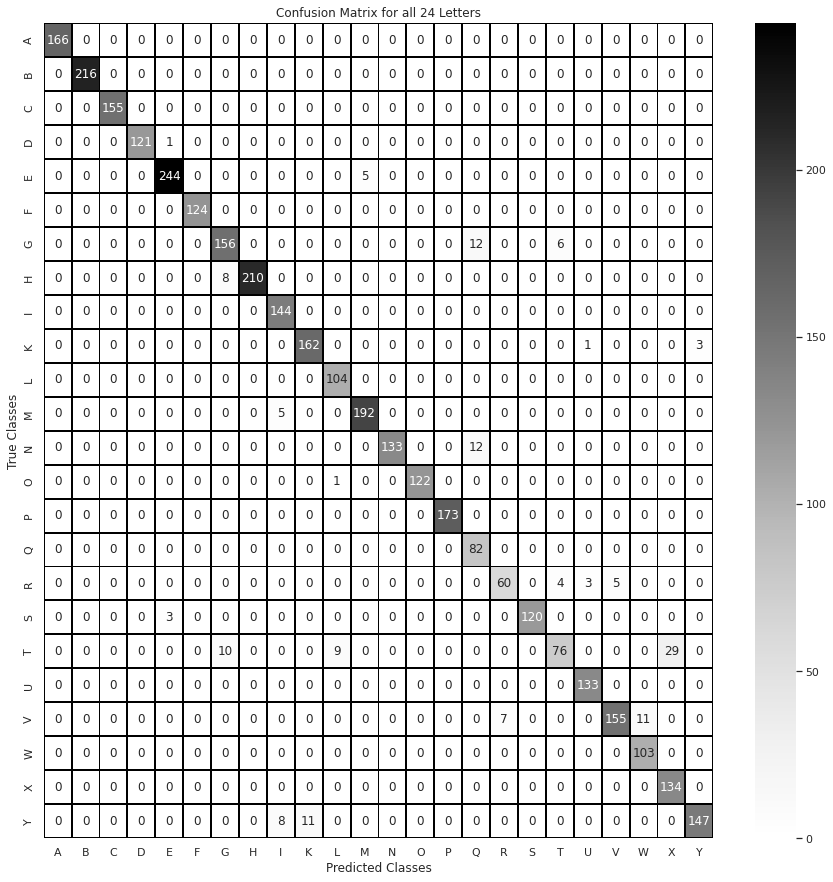

In [59]:
conf_matrix_best = pd.DataFrame(matrix , index = class_label , columns = class_label)
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix_best,cmap= "Greys", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.ylabel("True Classes")
plt.xlabel("Predicted Classes")
plt.title("Confusion Matrix for all 24 Letters")

**Statistical testing for the best and the second best parameters that we got**

Epoch 1/25
858/858 [==============================] - 4s 4ms/step - loss: 1.6967 - accuracy: 0.4793 - val_loss: 0.4629 - val_accuracy: 0.8424
Epoch 2/25
858/858 [==============================] - 3s 4ms/step - loss: 0.1653 - accuracy: 0.9464 - val_loss: 0.2908 - val_accuracy: 0.9222
Epoch 3/25
858/858 [==============================] - 3s 4ms/step - loss: 0.0554 - accuracy: 0.9820 - val_loss: 0.2065 - val_accuracy: 0.9331
Epoch 4/25
858/858 [==============================] - 4s 4ms/step - loss: 0.0271 - accuracy: 0.9924 - val_loss: 0.2089 - val_accuracy: 0.9387
Epoch 5/25
858/858 [==============================] - 4s 4ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.2560 - val_accuracy: 0.9498
Epoch 6/25
858/858 [==============================] - 3s 4ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.2804 - val_accuracy: 0.9398
Epoch 7/25
858/858 [==============================] - 4s 4ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.2567 - val_accuracy: 0.9448
Epoch 

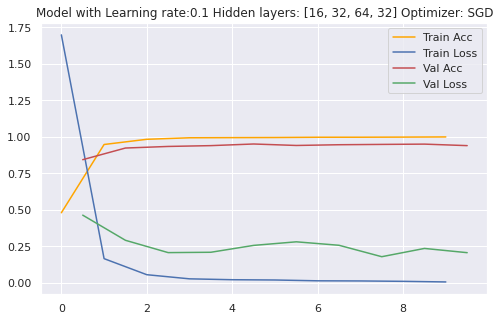

113/113 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9437
Epoch 1/25
858/858 [==============================] - 5s 5ms/step - loss: 0.9449 - accuracy: 0.7046 - val_loss: 0.4365 - val_accuracy: 0.8620
Epoch 2/25
858/858 [==============================] - 4s 5ms/step - loss: 0.1185 - accuracy: 0.9608 - val_loss: 0.2705 - val_accuracy: 0.9191
Epoch 3/25
858/858 [==============================] - 4s 4ms/step - loss: 0.0553 - accuracy: 0.9818 - val_loss: 0.2474 - val_accuracy: 0.9239
Epoch 4/25
858/858 [==============================] - 4s 4ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.2499 - val_accuracy: 0.9317
Epoch 5/25
858/858 [==============================] - 4s 4ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.2450 - val_accuracy: 0.9297
Epoch 6/25
858/858 [==============================] - 4s 5ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.1943 - val_accuracy: 0.9540
Epoch 7/25
858/858 [==============================] - 4s 5m

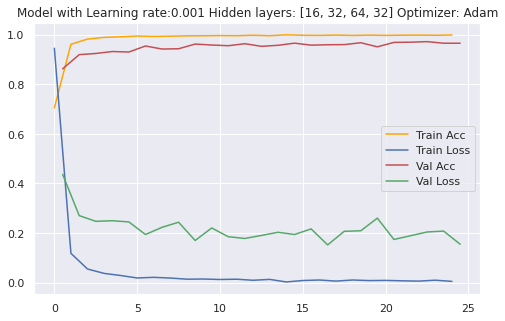

113/113 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.9615


In [62]:
#BEST CNN Model

# Setting parameters for CNN 
# Defining the number and size of hidden layers
hiddensizes = [16,32,64,32]

# Define the activation function to be used by hidden layers
actfn = "relu"

# Optimiser and learning rate
optimizer_2 = keras.optimizers.Adam
optimizer_1= keras.optimizers.SGD
learningrate_2 = 0.001 
learningrate_1 = 0.1

# Set size of batch and number of epochs
batch_size = 32
n_epochs = 25

valacc_1, history_1, model_1 = cnn_do_all(hiddensizes, actfn, optimizer_1, learningrate_1, n_epochs, batch_size)
plot_history(history_1,hiddensizes,learningrate_1,optimizer_1)
test_res_1 = model_1.evaluate( baseline_cnn_x_test,y_test)


valacc_2, history_2, model_2 = cnn_do_all(hiddensizes, actfn, optimizer_2, learningrate_2, n_epochs, batch_size)
plot_history(history_2,hiddensizes,learningrate_2,optimizer_2)
test_res_2 = model_2.evaluate(baseline_cnn_x_test,y_test)

In [65]:
# Unbiased Result on the BEST MODEL
print("Unbiased accuracy estimate of a deep learning model")
print('Loss on Test Set for best model: ',test_res_2[0])
print("Accuracy on Test Set for best model: ",test_res_2[1])

Unbiased accuracy estimate of a deep learning model
Loss on Test Set for best model:  0.1831432580947876
Accuracy on Test Set for best model:  0.9615170359611511


In [66]:
# Unbiased Result on the SECOND BEST MODEL
print("Unbiased accuracy estimate of a deep learning model")
print('Loss on Test Set for best model: ',test_res_1[0])
print("Accuracy on Test Set for best model: ",test_res_1[1])

Unbiased accuracy estimate of a deep learning model
Loss on Test Set for best model:  0.2790830433368683
Accuracy on Test Set for best model:  0.943669855594635


In [67]:
y_test_cnn_pred = []
y_test_cnn_pred += [ np.argmax(model_1.predict(baseline_cnn_x_test), axis=1) ]
y_test_cnn_pred += [ np.argmax(model_2.predict(baseline_cnn_x_test), axis=1) ]
from mlxtend.evaluate import permutation_test
from sklearn.metrics import accuracy_score
p_value = permutation_test(y_test_cnn_pred[0], y_test_cnn_pred[1],func=lambda x, y: np.abs(accuracy_score(y_test,x) - accuracy_score(y_test,y)),method="approximate", seed=0, num_rounds=1000)

print(f'P value comparing methods: {p_value:.3f} ')

print(f'\nThreshold is {0.05/1:.4f}, where P value needs to be below this for significance')

P value comparing methods: 0.001 

Threshold is 0.0500, where P value needs to be below this for significance


From the above p-value we can say that for the best model and the second best model the performance is significantly different.

In [68]:
character_df[character_df['Accuracy'] == character_df['Accuracy'].min()]

,Characters,Accuracy
18,T,0.612903


**Reporting of final results:**

We loaded the data, checked it, fixed the problem that the max value was 200 but we wanted the max value as 24 so we changed the values, and displayed a sample of our data.

We then trained and optimised our two models that we were asked to do that were densely connected and CNN models with regularisation parameter as it gave best results and found the optimized parameters for each model and plotted the learning_curves. We got best accuracy for our CNN model with optimized hyperparameters. Thus we can say that the best model is CNN.


From the result we can answer the clients questions as:

i) Unbiased accuracy estimate of a deep learning model is **96.1%**

ii) The letter with the lowest individual accuracy is for the letter "**T**"

iii) For the most common error we can say that the letter "**T**" is most commonly classified as "**X**"

**Recommendations**:


For our dataset the letter "J" and "Z" are not included thus our model won't classify these two letters or else might miss-classify these which will not give accurate results for other datasets.

Thus for further analysis we can say that if provided by a better dataset it can give a better accuracy on any dataset